<a href="https://colab.research.google.com/github/LauraGuio/MachineLearning/blob/master/P5_Titanic_Arboles_Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic

##1. Cargar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier #clase de árboles de decisión 
from sklearn.datasets import load_iris

##2. Cargar DataSet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFx6QclydXu9LJ9qvtIgMSDllTXwGfRF0JAbd4-Tj1nmV3cIIdHqUw
Mounted at /content/drive


In [3]:
df=pd.DataFrame
df=pd.read_csv('/content/drive/My Drive/Deep learning/dataset_titanic.csv', encoding='utf-8')

##3. Explorar datos

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se debe tener en cuenta: 
*   Survived: 0=No, 1=Yes
*   Sex: 0=male, 1=female
*   PClass: Ticket class
*   Sibs: número de hermanos/ conyuges
*   Parch: número de padres/ hijos a bordo
*   Embarked: C=Cherbourg, Q=QueenStown S=Southampton 







###Se cuenta número de registros del dataset

In [5]:
df.shape

(891, 12)

El DataSet tiene 891 filas y 12 columnas; es decir, tiene 12 características y 891 registros.

###Se verifica si existen datos nulos

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Si existen datos nulos, en total existen 866 valores nulos. En este caso, vamos a predecir los valores nulos. Se crearán dos bloques: uno con valores nulos y el otro sin ellos y se entrenarán.

Se cambian los valores que están en formato texto a numérico

In [7]:
df.replace({"male":0,"female":1,'C':1,'Q':2,'S':3},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0


Se crea la estructura y se entrena el modelo

In [8]:
#Crear DataSet con características seleccionadas
titanic_data= pd.DataFrame({"Survived":df["Survived"],"Pclass":df["Pclass"],"Sex":df["Sex"],
              "Age":df["Age"],"SibSp":df["SibSp"],"Parch":df["Parch"],"Fare":df["Fare"],"Embarked":df["Embarked"]})
data_set_not_null=titanic_data.drop(titanic_data[titanic_data.Age.isnull()].index)
data_set_not_null.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,0,35.0,0,0,8.0500,3.0


In [9]:
car=["Survived","Pclass","Sex","SibSp","Parch","Fare"]
y=data_set_not_null["Age"]
x=data_set_not_null[car]
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ahora se realiza la predicción para la edad

In [11]:
X=titanic_data[car]
predict=model.predict(X)

Se sustituyen los valores encontrados en el dataframe original

In [12]:
titanic_data.fillna(0, inplace=True) #fue NECESARIO el inplace
#titanic_data.Age.fillna(predict)
#titanic_data.loc[(titanic_data.Age.isnull(), "Age"]=predict

Verificamos si existen datos nulos

In [13]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

###Graficar comparaciones

**SOBREVIVIENTES VS NO-SOBREVIVIENTES**

Text(0.5, 1.0, 'Sobrevivientes VS No-Sobrevivientes')

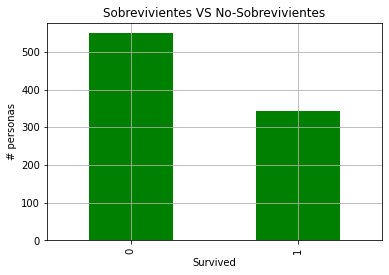

In [14]:
surv = titanic_data.groupby(['Survived']).size()
surv.plot.bar(color='green').grid(True)
plt.ylabel("# personas")
plt.title("Sobrevivientes VS No-Sobrevivientes")

**HOMBRES VS MUJERES QUE SOBREVIVIERON**

Text(0.5, 1.0, 'Género VS Supervivencia')

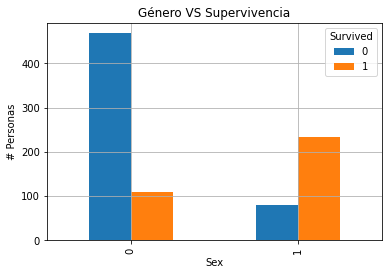

In [15]:
gender_surv = pd.crosstab(titanic_data['Sex'],titanic_data['Survived'])
gender_surv.plot.bar().grid(True)
plt.ylabel("# Personas")
plt.title("Género VS Supervivencia")

#gender_surv=titanic_data.groupby(['Survived','Sex']).size()
#gender_surv.plot.bar(color='blue').grid(True)

Género -> 0=male, 1=female
¿Sobrevivieron? -> 0=No, 1=Yes

**SOBREVIVIENTES POR EDAD (HISTOGRAMA)**

Text(0.5, 1.0, 'Sobrevivientes por Edad')

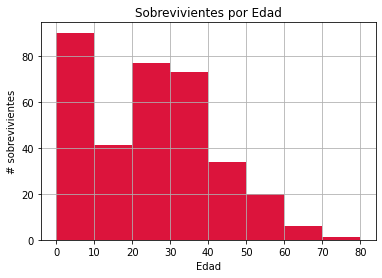

In [16]:
Sur_Age = titanic_data.Age[titanic_data.Survived==1]
Sur_Age.plot(kind="hist", color="crimson",bins=8).grid(True)
plt.xlabel("Edad")
plt.ylabel("# sobrevivientes")
plt.title("Sobrevivientes por Edad")

**¿CÓMO ESTABAN DISTRIBUIDOS LOS PASAJEROS POR CLASE?**

**CLASE VS SOBREVIVIENTES (HISTOGRAMA)**

Text(0.5, 1.0, 'Clase VS Sobrevivientes')

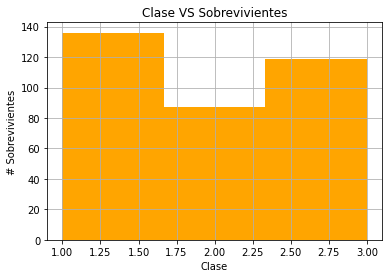

In [17]:
Pclass_Sup = titanic_data.Pclass[titanic_data.Survived==1]
Pclass_Sup.plot(kind="hist", color="orange", bins=3).grid(True)
plt.xlabel("Clase")
plt.ylabel("# Sobrevivientes")
plt.title("Clase VS Sobrevivientes")

##4. Separar datos

In [18]:
feature_names=["Pclass","Sex","SibSp","Parch","Fare","Embarked"]
x_train, x_test, y_train, y_test = train_test_split(titanic_data[feature_names],titanic_data['Survived'],
                                                    random_state=2)

##5.Crear instancia de algoritmo

In [19]:
arbol =DecisionTreeClassifier(max_depth=2, random_state=0)

##6.Entrenar algoritmo

In [20]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##7.Predecir valores

In [21]:
print(x_test.iloc[0])
print(y_test.iloc[0])

Pclass       1.0000
Sex          0.0000
SibSp        0.0000
Parch        0.0000
Fare        26.2875
Embarked     3.0000
Name: 707, dtype: float64
1


**Se hace predicción**

In [22]:
arbol.predict(x_test.iloc[0:10])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

##8.Calcular exactitud 

In [24]:
accuracy=arbol.score(x_test,y_test)
print(accuracy)

0.7488789237668162


##9.Graficar árbol

In [25]:
class_name_list = list(['no_sobrevive','sobrevive'])
from sklearn.tree import export_graphviz   #importar para raficar el árbol
from pydotplus import graph_from_dot_data #convierte datos que estan en la variables arbol
dot_data = export_graphviz(arbol, feature_names=feature_names, class_names=class_name_list)
grafico=graph_from_dot_data(dot_data)
grafico.write_png('arbol_surv.png')

True

##10.¿Optimizar el árbol?

Al visualiza el árbol generado, podemos evidenciar que debe tener más profundidad, ya que con unaprofundidad 2 solo tienen una probabilidad del 75% 

In [ ]:
df_importancia = pd.DataFrame({"característica": x_train.columns, "Importancia":arbol.feature_importances_})
df_importancia = df_importancia.sort_values("Importancia",ascending=False)
df_importancia.head()

,característica,Importancia
1,Sex,0.692764
0,Pclass,0.211268
4,Fare,0.095967
2,SibSp,0.000000
3,Parch,0.000000


**Probar diferentes profundidades**

In [ ]:
depth_list=list(range(1,10))
accuracy_list=[]
for depth in depth_list:
  arbol=DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(x_train,y_train)
  score=arbol.score(x_test,y_test)
  accuracy_list.append(score)

**Graficar resultado**

<function matplotlib.pyplot.show>

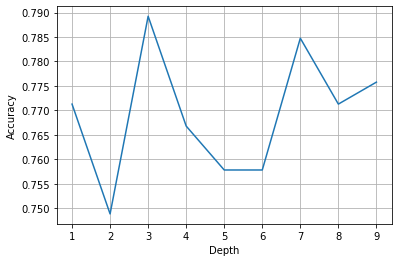

In [ ]:
plt.plot(depth_list,accuracy_list)
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.grid(True)
plt.show

La mejor probabilidad se obtiene con la profundidad 3 